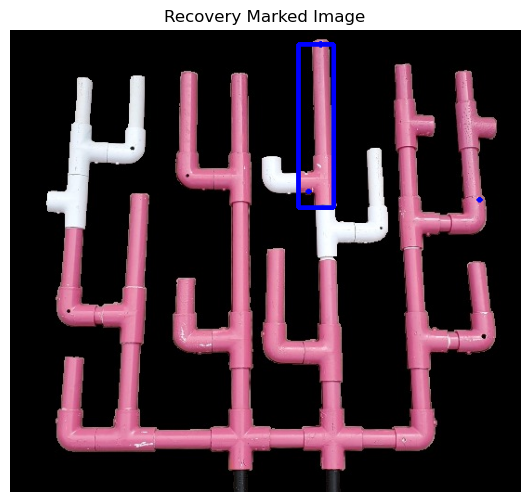

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load previous and current images
 # Load images (replace with actual file paths)
previous_image = cv2.imread("Coral_colony_photo_1_year_ago.jpg")
current_image = cv2.imread("Coral_colony_photo_today.jpeg")

# Convert images to HSV color space
previous_hsv = cv2.cvtColor(previous_image, cv2.COLOR_BGR2HSV)
current_hsv = cv2.cvtColor(current_image, cv2.COLOR_BGR2HSV)

# Calculate absolute difference in HSV color space
diff_hsv = cv2.absdiff(previous_hsv, current_hsv)

# Define lower and upper bounds for pink in HSV
lower_pink = np.array([160, 75,160])  # Adjust these values for better pink detection
upper_pink = np.array([170,145, 235])#djust these values for better pink detection


# Create a binary mask for pink regions
pink_mask = cv2.inRange(diff_hsv, lower_pink, upper_pink)

# Find contours in the binary mask
contours, _ = cv2.findContours(pink_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw green rectangles around areas of growth
growth_marked_image = current_image.copy()
green_color = (0, 255, 0)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(growth_marked_image, (x, y), (x + w, y + h), green_color, 2)



# Define lower and upper bounds for white in HSV
lower_white = np.array([0, 0, 50])  # Adjust these values for better white detection
upper_white = np.array([255, 47, 255])  # Adjust these values for better white detection

# Create a binary mask for white regions in the previous image
white_mask_previous = cv2.inRange(previous_hsv, lower_white, upper_white)

# Create a binary mask for pink regions in the current image
pink_mask_current = cv2.inRange(current_hsv, np.array([150, 50, 150]), np.array([170, 255, 255]))

# Combine the masks to detect recovery from bleaching
recovery_mask = cv2.bitwise_and(white_mask_previous, pink_mask_current)

# Find contours in the recovery mask
contours, _ = cv2.findContours(recovery_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw green rectangles around areas of recovery
recovery_marked_image = current_image.copy()
blue_color = (255, 0, 0)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(recovery_marked_image, (x, y), (x + w, y + h), blue_color, 3)

# Display the image with marked recovery areas using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(recovery_marked_image, cv2.COLOR_BGR2RGB))
plt.title('Recovery Marked Image')
plt.axis('off')
plt.show()


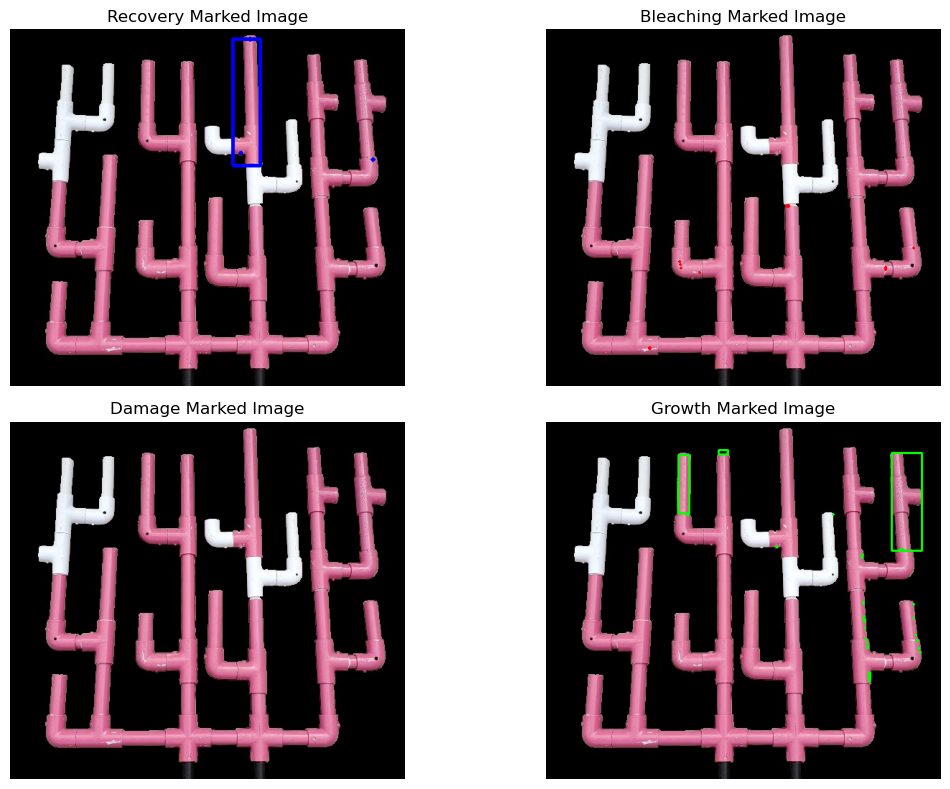

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to mark recovery areas
def mark_recovery_areas(previous_hsv, current_hsv, marked_image):
    # Define lower and upper bounds for white in HSV
    lower_white = np.array([0, 0, 50])
    upper_white = np.array([255, 47, 255])
    
    # Create masks for white regions in the previous and pink regions in the current images
    white_mask_previous = cv2.inRange(previous_hsv, lower_white, upper_white)
    pink_mask_current = cv2.inRange(current_hsv, np.array([150, 50, 150]), np.array([170, 255, 255]))
    
    # Combine masks to detect recovery from bleaching
    recovery_mask = cv2.bitwise_and(white_mask_previous, pink_mask_current)
    
    # Find contours in the recovery mask
    contours, _ = cv2.findContours(recovery_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw rectangles around areas of recovery
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(marked_image, (x, y), (x + w, y + h), (255, 0, 0), 3)
    return marked_image

# Function to mark bleaching areas
def mark_bleaching_areas(previous_hsv, current_hsv, marked_image):
    # Define lower and upper bounds for pink in HSV for coral bleaching
    lower_pink = np.array([150, 50, 150])
    upper_pink = np.array([170, 255, 255])
    
    # Create masks for pink regions in the previous and white regions in the current images
    pink_mask_previous = cv2.inRange(previous_hsv, lower_pink, upper_pink)
    white_mask_current = cv2.inRange(current_hsv, np.array([0, 0, 200]), np.array([255, 30, 255]))
    
    # Combine masks to detect bleaching
    bleaching_mask = cv2.bitwise_and(pink_mask_previous, white_mask_current)
    
    # Find contours in the bleaching mask
    contours, _ = cv2.findContours(bleaching_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw rectangles around areas of bleaching
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(marked_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    return marked_image

# Function to mark damage areas
def mark_damage_areas(previous_image, current_image, marked_image):
    # Calculate absolute difference between images
    diff = cv2.absdiff(previous_image, current_image)
    
    # Convert difference to grayscale
    diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    
    # Apply threshold to create binary mask
    threshold_value = 250
    ret, binary_mask = cv2.threshold(diff_gray, threshold_value, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw rectangles around areas of damage or death
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(marked_image, (x, y), (x + w, y + h), (0, 255, 255), 2)
    return marked_image

# Function to mark growth areas
def mark_growth_areas(previous_hsv, current_hsv, marked_image):
    # Define lower and upper bounds for pink in HSV
    lower_pink = np.array([160, 75, 160])
    upper_pink = np.array([170, 145, 235])
    
    # Calculate absolute difference in HSV color space
    diff_hsv = cv2.absdiff(previous_hsv, current_hsv)
    
    # Create mask for pink regions
    pink_mask = cv2.inRange(diff_hsv, lower_pink, upper_pink)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(pink_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw rectangles around areas of growth
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(marked_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return marked_image

# Load images (replace with actual file paths)
previous_image = cv2.imread("Coral_colony_photo_1_year_ago.jpg")
current_image = cv2.imread("Coral_colony_photo_today.jpeg")

# Convert images to HSV color space
previous_hsv = cv2.cvtColor(previous_image, cv2.COLOR_BGR2HSV)
current_hsv = cv2.cvtColor(current_image, cv2.COLOR_BGR2HSV)

# Create a blank image for marking
marked_image = current_image.copy()

# Call the functions to mark different areas and get the marked images
recovery_marked_image = mark_recovery_areas(previous_hsv, current_hsv, marked_image.copy())
bleaching_marked_image = mark_bleaching_areas(previous_hsv, current_hsv, marked_image.copy())
damage_marked_image = mark_damage_areas(previous_image, current_image, marked_image.copy())
growth_marked_image = mark_growth_areas(previous_hsv, current_hsv, marked_image.copy())

# Display the final marked images using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(cv2.cvtColor(recovery_marked_image, cv2.COLOR_BGR2RGB))
plt.title('Recovery Marked Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(cv2.cvtColor(bleaching_marked_image, cv2.COLOR_BGR2RGB))
plt.title('Bleaching Marked Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(cv2.cvtColor(damage_marked_image, cv2.COLOR_BGR2RGB))
plt.title('Damage Marked Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(cv2.cvtColor(growth_marked_image, cv2.COLOR_BGR2RGB))
plt.title('Growth Marked Image')
plt.axis('off')

plt.tight_layout()
plt.show()
